<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/Bitcoin_data_collection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data collection

In [2]:
!pip install yfinance pandas

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import requests

# Set seaborn style for better visualization
sns.set_style("darkgrid")

In [3]:
# Define the coins you want to compare
coins = {
    "bitcoin": "BTC-USD",
    # "ethereum": "ETH-USD",
    # "binancecoin": "BNB-USD",
    # "solana": "SOL-USD",
    # "dogecoin": "DOGE-USD",
}

# Function to get circulating supply from CoinGecko
def get_circulating_supply(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}"
    response = requests.get(url)
    data = response.json()
    return data["market_data"]["circulating_supply"]

# Create an empty DataFrame to store all coin data
all_data = []

for coin, ticker in coins.items():
    print(f"Fetching data for {coin}...")

    # Get historical price data from Yahoo Finance
    crypto = yf.Ticker(ticker)
    df = crypto.history(period="max")

    # Reset index to make Date a column
    df.reset_index(inplace=True)

    # Get circulating supply from CoinGecko
    circulating_supply = get_circulating_supply(coin)

    # Calculate Market Cap
    df["Market Cap"] = df["Close"] * circulating_supply

    # Add a column for the coin name
    df["Coin"] = coin.capitalize()

    # Append to list
    all_data.append(df)

# Combine all data into one DataFrame
df = pd.concat(all_data, ignore_index=True)

# Save to CSV for Tableau
df.to_csv("bitcoin_analysis.csv", index=False)

print("Crypto comparison data saved to bitcoin_analysis.csv")

Fetching data for bitcoin...
Crypto comparison data saved to bitcoin_analysis.csv


In [4]:
#load data
df = pd.read_csv('/content/bitcoin_analysis.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap,Coin
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,9.065067e+09,Bitcoin
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,8.413057e+09,Bitcoin
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,7.825467e+09,Bitcoin
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,8.105109e+09,Bitcoin
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,7.905249e+09,Bitcoin


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap,Coin
3793,2025-02-04 00:00:00+00:00,101398.718750,101745.617188,96208.109375,97871.820312,73002130211,0.0,0.0,1.939971e+12,Bitcoin
3794,2025-02-05 00:00:00+00:00,97878.007812,99113.210938,96174.828125,96615.445312,49125911241,0.0,0.0,1.915067e+12,Bitcoin
3795,2025-02-06 00:00:00+00:00,96610.640625,99168.609375,95707.351562,96593.296875,45302471947,0.0,0.0,1.914628e+12,Bitcoin
3796,2025-02-07 00:00:00+00:00,96581.320312,100154.140625,95653.882812,96529.085938,55741290456,0.0,0.0,1.913356e+12,Bitcoin
3797,2025-02-08 00:00:00+00:00,96541.492188,96871.734375,95853.882812,96075.070312,44536344576,0.0,0.0,1.904356e+12,Bitcoin


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3798 non-null   object 
 1   Open          3798 non-null   float64
 2   High          3798 non-null   float64
 3   Low           3798 non-null   float64
 4   Close         3798 non-null   float64
 5   Volume        3798 non-null   int64  
 6   Dividends     3798 non-null   float64
 7   Stock Splits  3798 non-null   float64
 8   Market Cap    3798 non-null   float64
 9   Coin          3798 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 296.8+ KB


## Data cleaning

### Date column

In [8]:
# Convert the 'Date' column to datetime with UTC awareness.
# The parameter errors='raise' will throw an error if any value cannot be converted.
df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='raise')

# Check the dtype to verify conversion
print("After conversion, Date dtype:", df['Date'].dtype)

After conversion, Date dtype: datetime64[ns, UTC]


In [9]:
# Remove timezone information, making the datetime values timezone-naive.
df['Date'] = df['Date'].dt.tz_localize(None)

In [10]:
# having the Date as the index allows for easy slicing, filtering, and applying time-based functions.
df.set_index('Date', inplace=True)

In [11]:
#Sorting the data chronologically is essential to preserve the temporal order
df.sort_index(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3798 entries, 2014-09-17 to 2025-02-08
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3798 non-null   float64
 1   High          3798 non-null   float64
 2   Low           3798 non-null   float64
 3   Close         3798 non-null   float64
 4   Volume        3798 non-null   int64  
 5   Dividends     3798 non-null   float64
 6   Stock Splits  3798 non-null   float64
 7   Market Cap    3798 non-null   float64
 8   Coin          3798 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 296.7+ KB


### Remove Unnecessary Columns

In [13]:
# Check if 'Dividends' and 'Stock Splits' columns contain only zeros, and drop them if so.
if (df['Dividends'] == 0).all():
    df.drop(columns=['Dividends'], inplace=True)
if (df['Stock Splits'] == 0).all():
    df.drop(columns=['Stock Splits'], inplace=True)

print("\nStep 5: Removed unnecessary columns (Dividends and Stock Splits) if they contained only zeros")
print(df.columns)


Step 5: Removed unnecessary columns (Dividends and Stock Splits) if they contained only zeros
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Coin'], dtype='object')


In [14]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,Coin
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,9.065067e+09,Bitcoin
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,8.413057e+09,Bitcoin
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,7.825467e+09,Bitcoin
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,8.105109e+09,Bitcoin
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,7.905249e+09,Bitcoin


## Feature Engineering

### Date/Time Decomposition

In [15]:
df['Year']    = df.index.year
df['Month']   = df.index.month
df['Day']     = df.index.day
df['Quarter'] = df.index.quarter
df['Weekday'] = df.index.dayofweek

- **Extracting Temporal Components:** Breaking the date into components (year, month, day, quarter, weekday) to analyze seasonal trends and patterns.
For instance, certain months or days of the week tend to have higher volatility or trading volume.
- **Facilitating Aggregation:** These components make it easier to aggregate or segment the data for further analysis (e.g., average returns per quarter).

### Compute Price Returns

In [16]:
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

- **Daily Returns:** Calculating the percentage change from one day to the next normalizes the data and provides a direct measure of performance on a day-to-day basis.
- **Log Returns:** Logarithmic returns are additive over time and often used in finance because they handle compounding effects better and can make statistical properties (like normality) more apparent.
- **Risk and Performance Analysis:** Both return calculations are crucial for understanding the performance, risk, and volatility of the asset over time.

### Moving Averages (Trend Indicators)


####Exponential Moving Averages (EMAs)

In [17]:
# Calculate the 7-day and 30-day EMA for the Close price
df['EMA_7']  = df['Close'].ewm(span=7, adjust=False).mean()
df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()

- Smoothing Short-Term Fluctuations: Moving averages help smooth out the “noise” in the data, revealing underlying trends by averaging out short-term fluctuations.
- Trend Identification: Short-term (7-day) and long-term (30-day) moving averages can indicate momentum and potential turning points in the price series.
- Signal Generation: In many trading strategies, crossovers between different moving averages are used as buy or sell signals.

In [18]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,Coin,Year,Month,Day,Quarter,Weekday,Daily_Return,Log_Return,EMA_7,EMA_30
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,9.065067e+09,Bitcoin,2014,9,17,3,2,NaN,NaN,457.334015,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,8.413057e+09,Bitcoin,2014,9,18,3,3,-0.071926,-0.074643,449.110512,455.211821
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,7.825467e+09,Bitcoin,2014,9,19,3,4,-0.069843,-0.072402,435.531881,451.314025
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,8.105109e+09,Bitcoin,2014,9,20,3,5,0.035735,0.035111,428.874909,448.577894
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,7.905249e+09,Bitcoin,2014,9,21,3,6,-0.024659,-0.024968,421.361435,445.367773


### Relative Strength Index (RSI)

RSI is a key momentum indicator for market timing.

In [19]:
def rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = rsi(df['Close'], 14)


### Bollinger Bands (Market Volatility & Reversals)

In [20]:
df['MA_20'] = df['Close'].rolling(20).mean()
df['Upper_BB'] = df['MA_20'] + (df['Close'].rolling(20).std() * 2)
df['Lower_BB'] = df['MA_20'] - (df['Close'].rolling(20).std() * 2)


In [21]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,Coin,Year,Month,Day,Quarter,Weekday,Daily_Return,Log_Return,EMA_7,EMA_30,RSI_14,MA_20,Upper_BB,Lower_BB
Date,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,9.065067e+09,Bitcoin,2014,9,17,3,2,NaN,NaN,457.334015,457.334015,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,8.413057e+09,Bitcoin,2014,9,18,3,3,-0.071926,-0.074643,449.110512,455.211821,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,7.825467e+09,Bitcoin,2014,9,19,3,4,-0.069843,-0.072402,435.531881,451.314025,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,8.105109e+09,Bitcoin,2014,9,20,3,5,0.035735,0.035111,428.874909,448.577894,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,7.905249e+09,Bitcoin,2014,9,21,3,6,-0.024659,-0.024968,421.361435,445.367773,NaN,NaN,NaN,NaN


In [22]:
# check missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market Cap,0
Coin,0
Year,0
Month,0
Day,0


1. Daily_Return & Log_Return (1 missing value)

- These features use .pct_change() and np.log(), which require at least two consecutive values to compute.
- The first row in the dataset will have a missing value.
2. RSI_14 (13 missing values)

- RSI is calculated using a 14-day rolling window.
- The first 13 rows will have missing values because there's not enough past data to compute RSI.
3. MA_20, Upper_BB, Lower_BB (19 missing values)

- Bollinger Bands require a 20-day moving window to compute.
- The first 19 rows will have missing values because there’s not enough data.


### missing values only occur at the very beginning

In [23]:
df.dropna(inplace=True)

In [24]:
#check missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market Cap,0
Coin,0
Year,0
Month,0
Day,0


In [25]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,Coin,Year,Month,Day,Quarter,Weekday,Daily_Return,Log_Return,EMA_7,EMA_30,RSI_14,MA_20,Upper_BB,Lower_BB
Date,,,,,,,,,,,,,,,,,,,,
2014-10-06,320.389008,345.134003,302.559998,330.079010,79011800,6.542676e+09,Bitcoin,2014,10,6,4,0,0.029856,0.029419,349.294184,398.996478,30.138935,389.910399,461.027732,318.793066
2014-10-07,330.584015,339.247009,320.481995,336.187012,49199900,6.663746e+09,Bitcoin,2014,10,7,4,1,0.018505,0.018336,346.017391,394.944255,17.642549,383.853049,451.334641,316.371457
2014-10-08,336.115997,354.364014,327.187988,352.940002,54736300,6.995816e+09,Bitcoin,2014,10,8,4,2,0.049832,0.048630,347.748044,392.234303,27.775351,380.278049,446.265429,314.290669
2014-10-09,352.747986,382.726013,347.687012,365.026001,83641104,7.235380e+09,Bitcoin,2014,10,9,4,3,0.034244,0.033671,352.067533,390.478929,35.319233,378.789549,444.741094,312.838004
2014-10-10,364.687012,375.066986,352.963013,361.562012,43665700,7.166718e+09,Bitcoin,2014,10,10,4,4,-0.009490,-0.009535,354.441153,388.613321,36.159745,376.422450,441.211135,311.633765


## Save cleaned Data

In [26]:
# Save the engineered DataFrame to a CSV file
output_filename = 'bitcoin_analysis_engineered.csv'
df.to_csv(output_filename)
print(f"Data saved as '{output_filename}'")

Data saved as 'bitcoin_analysis_engineered.csv'


## Data Analysis

In [27]:
print(df.describe())

                Open           High            Low          Close  \
count    3779.000000    3779.000000    3779.000000    3779.000000   
mean    20483.754595   20943.091398   20005.760162   20507.802642   
std     23434.097927   23944.317891   22910.302889   23462.144508   
min       176.897003     211.731003     171.509995     178.102997   
25%      1588.195007    1670.690002    1578.340027    1660.029968   
50%      9525.074219    9701.299805    9319.653320    9525.750977   
75%     32767.397461   33978.488281   31256.747070   32802.185547   
max    106147.296875  109114.882812  105291.734375  106146.265625   

             Volume    Market Cap         Year        Month          Day  \
count  3.779000e+03  3.779000e+03  3779.000000  3779.000000  3779.000000   
mean   1.905150e+10  4.064964e+11  2019.430537     6.571844    15.729293   
std    2.073349e+10  4.650560e+11     2.997198     3.504412     8.804537   
min    5.914570e+06  3.530277e+09  2014.000000     1.000000     1.000000  

### Visualizing Trends Over Time

###  Bitcoin Closing Price Trend



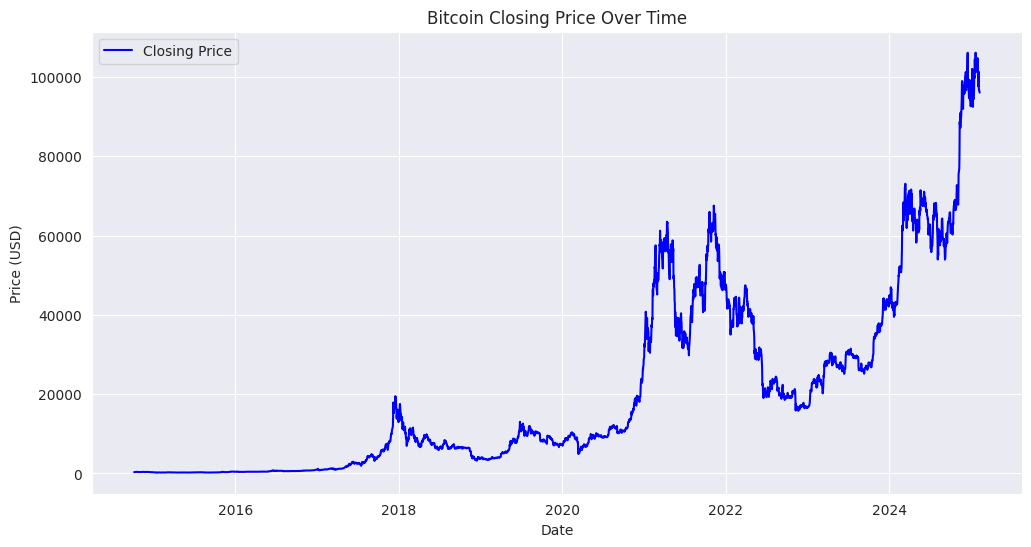

In [28]:
# Create the figure and plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')

# Add title and labels
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

### Bitcoin Price Trends: Key Insights  

Long-Term Uptrend

Bitcoin has experienced multiple price surges, with significant peaks in 2017, 2021, and 2024.
The overall trend remains bullish, despite periodic corrections.

#### Early Growth (Pre-2017)  
Bitcoin saw slow but steady adoption, transitioning from niche interest to mainstream recognition.  

#### 2017 Bull Run & Crash  
Bitcoin hit **$20,000** in December 2017, driven by retail FOMO and ICOs, followed by a crash in early 2018 due to regulatory concerns.  

#### 2020–2021 Institutional Surge  
Fueled by Tesla, MicroStrategy, and PayPal, Bitcoin peaked at **$60,000** in April 2021 before dropping due to China's mining ban and profit-taking.  

#### 2021 ATH & 2022 Bear Market  
Bitcoin reached an all-time high (~**$69,000**) in late 2021 but crashed in 2022 due to rising interest rates, the Terra (LUNA) collapse, and the FTX crisis.  

#### 2023–2024 Recovery & New Highs  
Bitcoin rebounded with ETF approvals and institutional demand, surpassing **$100,000** in 2024, driven by macroeconomic trends and halving anticipation.



### Bitcoin Price Trends by Year

- Mean (Blue Bars): The average Bitcoin price for the year.
- Max (Orange Bars): The highest price Bitcoin reached in that year.
- Min (Green Bars): The lowest price Bitcoin recorded in that year.

<Figure size 1000x500 with 0 Axes>

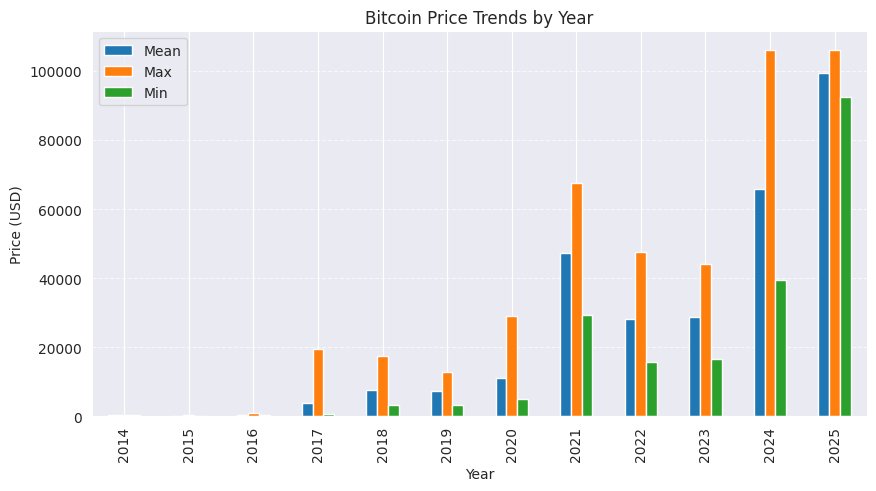

In [ ]:
# Plot Yearly Trends
plt.figure(figsize=(10, 5))
df.groupby('Year')['Close'].agg(['mean', 'max', 'min']).plot(kind='bar', figsize=(10, 5))
plt.title('Bitcoin Price Trends by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Mean', 'Max', 'Min'])
plt.show()

### Bitcoin Price Trends: Key Observations  

- **Low Prices Before 2017:** Bitcoin had relatively low volatility and price movement before 2017.  
- **2017 Peak:** Bitcoin saw a significant spike, with the highest price reaching around **\$20,000** during the famous bull run.  
- **2021 Bull Run:** Another major peak occurred in **2021**, with the maximum price exceeding **\$60,000**.  
- **Post-2022 Recovery:** The price dipped in **2022** but rebounded in **2023–2024**, reaching new highs above **$100,000** in **2024 and 2025**.  


### Monthly Trends

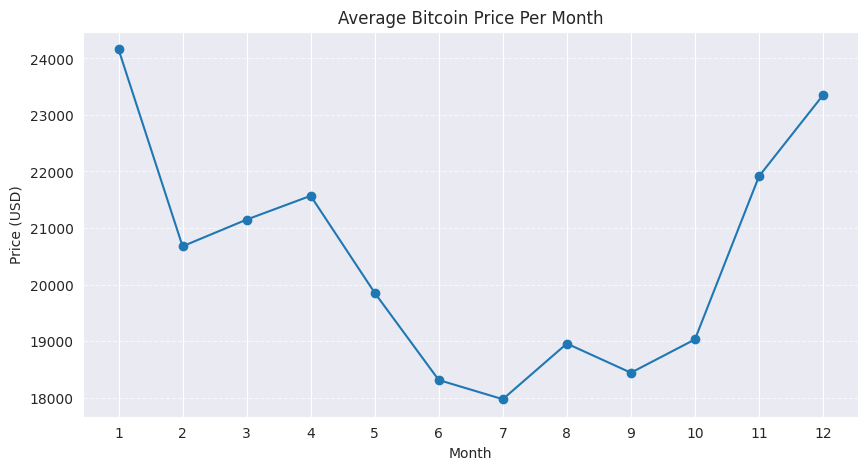

In [ ]:
# Plot Monthly Trends
plt.figure(figsize=(10, 5))
df.groupby('Month')['Close'].mean().plot(kind='line', marker='o')
plt.title('Average Bitcoin Price Per Month')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Bitcoin Price Trends Per Month: Key Insights**  

**1. Strong January Surge**  
- Bitcoin starts the year at a high price, aligning with the historical **"January effect"** as investors re-enter the market.  

**2. Mid-Year Decline (February - July)**  
- A steady decline from **February to July**, reflecting seasonal corrections and reduced market activity.  
- Historically, Bitcoin experiences a mid-year dip due to profit-taking and macroeconomic factors.  

**3. Lowest Prices in June - July**  
- The market often bottoms out in **June and July**, driven by regulatory news, miner capitulation, and liquidity shifts.  

**4. Recovery Phase (August - October)**  
- Bitcoin starts recovering from **August to October**, often fueled by institutional interest and anticipation of major events.  

**5. Year-End Rally (November - December)**  
- A strong upward trend in **November and December**, historically linked to **bull runs, institutional demand, and year-end financial strategies**.  

**Conclusion:**  
Bitcoin follows a **seasonal pattern**, with **Q1 and Q4 being bullish** and **mid-year experiencing dips**. Traders and investors can use this trend to **identify buying opportunities in mid-year** and **capitalize on year-end rallies**. 🚀  


### Weekday Trends

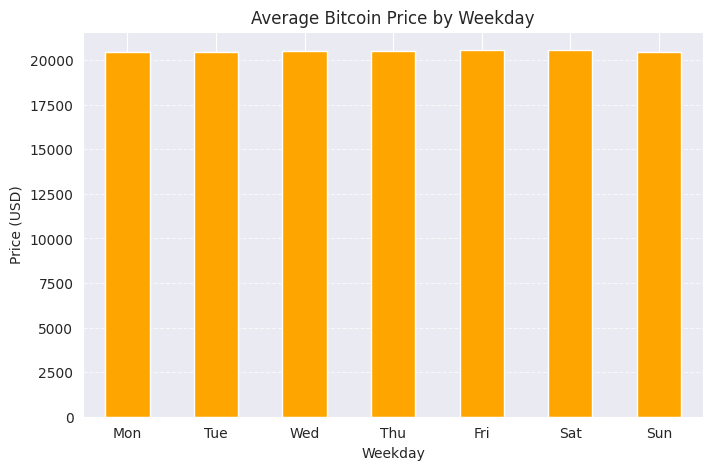

In [ ]:
# Plot Weekday Trends
plt.figure(figsize=(8, 5))
df.groupby('Weekday')['Close'].mean().plot(kind='bar', color='orange')
plt.title('Average Bitcoin Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Price (USD)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Summary: Average Bitcoin Price by Weekday  

- **Consistent Pricing:** Bitcoin prices remain stable across all weekdays, with no significant bias in price movements.  
- **Slight Variations:** Midweek (Wednesday to Friday) shows slightly higher average prices compared to Monday and Tuesday, indicating possible increased trading activity.  
- **Weekend Trading:** Prices do not drop significantly on weekends, suggesting that Bitcoin's 24/7 market sustains strong trading activity even outside traditional stock market hours.  


### Daily Returns Distribution

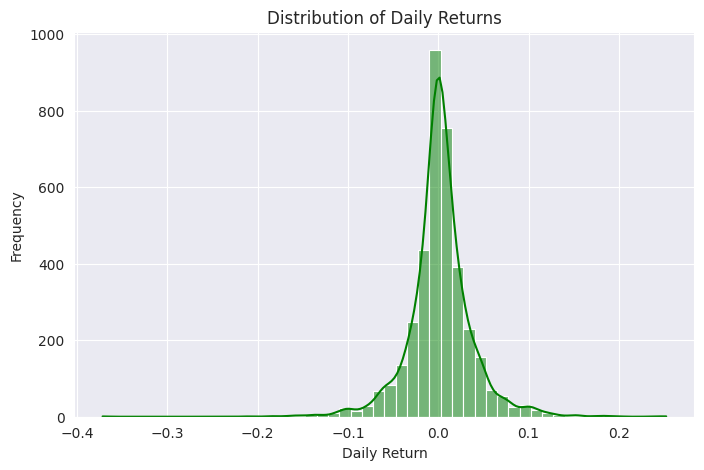

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily_Return'], bins=50, kde=True, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### Bitcoin Daily Returns Insights

**1. Returns are Centered Around Zero**
- Most daily returns cluster around **0%**, indicating Bitcoin's price is stable on most days.

**2. High Volatility**
- The distribution has **long tails**, meaning Bitcoin experiences **large price swings**, both positive and negative.

**3. More Negative Outliers**
- The left tail (negative returns) extends further, suggesting **more extreme downward price movements** than upward ones.

**4. Non-Normal Distribution**
- The distribution is **leptokurtic** (high peak, fat tails), meaning **Bitcoin is more prone to extreme price moves** than traditional assets.

**5. Risk vs. Reward**
- Bitcoin is a **high-risk, high-reward asset**.
- **Risk management** (e.g., stop-loss orders, hedging) is crucial due to the likelihood of extreme price fluctuations.

**Conclusion**
Bitcoin's return distribution confirms its **volatile and unpredictable nature**, making it attractive for traders but requiring caution for risk-averse investors.


### 7-day & 30-day Moving Averages

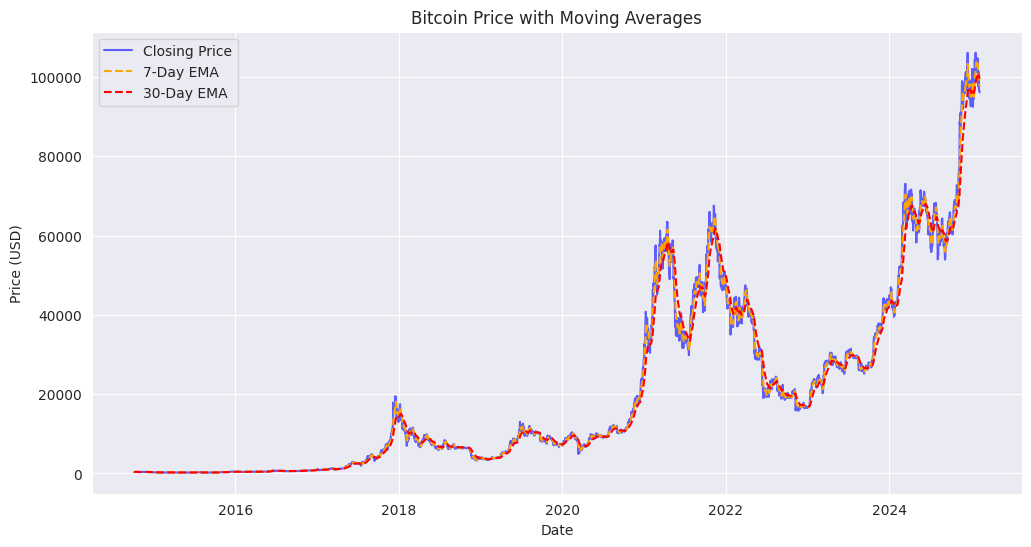

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['EMA_7'], label='7-Day EMA', color='orange', linestyle='dashed')
plt.plot(df.index, df['EMA_30'], label='30-Day EMA', color='red', linestyle='dashed')
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

###📈 Bitcoin Price with Moving Averages - Insights

**🔍 Key Observations**

 1️⃣ Long-Term Uptrend
- Bitcoin has experienced **multiple price surges**, with significant peaks in **2017, 2021, and 2024**.
- The overall trend remains **bullish**, despite **periodic corrections**.

2️⃣ Moving Averages as Trend Indicators
- **7-day EMA (orange, dashed line)** reacts quickly to price changes, tracking short-term movements.
- **30-day EMA (red, dashed line)** smooths out fluctuations, showing a **long-term trend**.
- **Bullish Signal**: When the **7-day EMA crosses above the 30-day EMA** (potential buying opportunity).
- **Bearish Signal**: When the **7-day EMA crosses below the 30-day EMA** (potential selling opportunity).

3️⃣ Volatility Patterns
- Bitcoin exhibits **high volatility**, with **sharp price increases and deep corrections**.
- The price tends to **overshoot and retrace**, making **risk management essential** for traders.

📌 Conclusion
- **Bitcoin remains a highly volatile asset**, with strong upward trends punctuated by deep pullbacks.
- **Short-term traders** can use the **7-day and 30-day EMAs** to identify potential buy/sell opportunities.
- **Long-term investors** may see corrections as **buying opportunities** in a long-term uptrend.

---
🚀 **Bitcoin's current market cap is $1.9T, reinforcing its dominance in the crypto space.**


### RSI (Relative Strength Index)

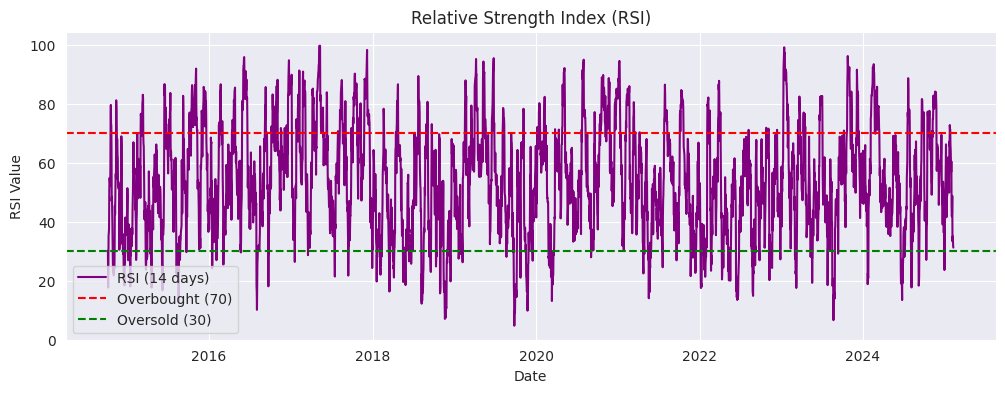

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['RSI_14'], label='RSI (14 days)', color='purple')
plt.axhline(70, linestyle='dashed', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='dashed', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

### **Insights from the Relative Strength Index (RSI) Chart**

- **RSI Volatility & Market Trends**  
  The RSI fluctuates significantly, showing clear buying and selling pressure shifts. Periods of RSI above 70 indicate overbought conditions, while values below 30 signal oversold conditions.  

- **Overbought & Oversold Signals**  
  There are multiple instances where RSI crosses **above 70**, often preceding market corrections. Similarly, sharp dips **below 30** align with potential price rebounds, signaling strong buying opportunities.  

- **Market Cycles & RSI Patterns**  
  The cyclical movement in RSI aligns with Bitcoin's major bull and bear markets. Spikes suggest rapid price surges, while deep declines indicate strong sell-offs, reflecting market sentiment shifts.  

- **Long-Term RSI Behavior**  
  RSI remains volatile over time, reinforcing Bitcoin’s historical price swings.   


### Bollinger Bands

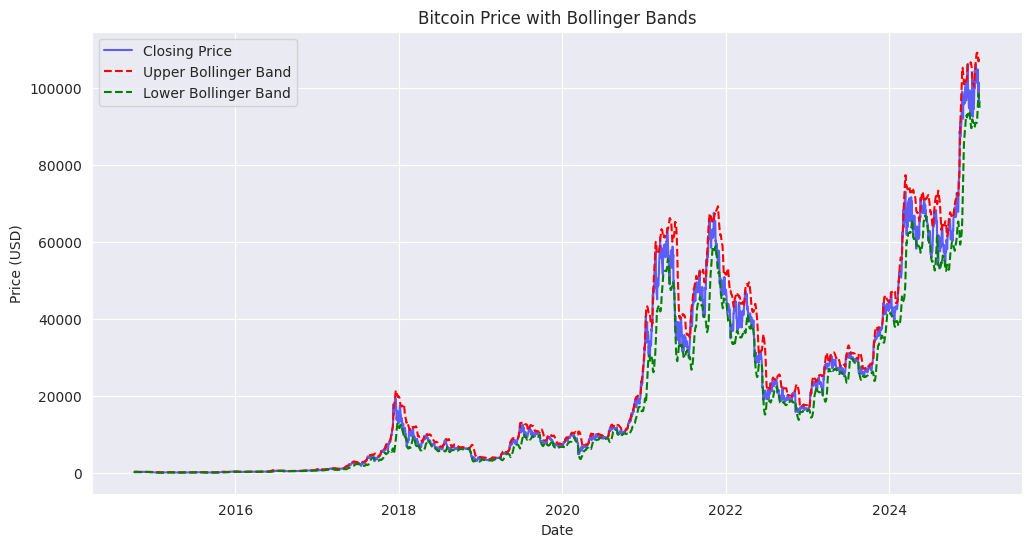

In [ ]:
plt.figure(figsize=(12, 6))

# Plot closing price
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.6)

# Plot Bollinger Bands
plt.plot(df.index, df['Upper_BB'], label='Upper Bollinger Band', color='red', linestyle='dashed')
plt.plot(df.index, df['Lower_BB'], label='Lower Bollinger Band', color='green', linestyle='dashed')

# Add title and labels
plt.title('Bitcoin Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### **Insights from Bitcoin Price with Bollinger Bands Chart**  

- **Volatility & Price Expansion**  
  The Bollinger Bands (red and green lines) widen significantly during periods of high volatility, such as Bitcoin's major bull runs in **2017, 2021, and 2024**. This indicates strong price movements and increased market activity.  

- **Mean Reversion Patterns**  
  Bitcoin’s price (blue line) frequently touches or moves beyond the **upper Bollinger Band**, signaling overbought conditions before corrections. Conversely, when price approaches the **lower Bollinger Band**, it often experiences rebounds, indicating oversold conditions.  

- **Periods of Consolidation**  
  During **2018–2020**, the bands remained relatively narrow, suggesting low volatility and sideways price movement before the major breakout in late 2020. Similar narrowing patterns can signal upcoming explosive moves.  

- **Recent Market Trends (2024)**  
  Bitcoin’s price has surged past **$100,000**, with Bollinger Bands expanding, indicating strong momentum. However, a touch on the upper band could mean a short-term correction is likely.  

- **Trading Strategy Implications**  
  - **Breakouts with Band Expansion** → Strong trends forming.  
  - **Touches on Upper Band** → Potential overbought signals.  
  - **Touches on Lower Band** → Potential buying opportunities.  


### Bitcoin Candlestick Chart

In [31]:
# Selecting the last 100 days for visualization clarity
df_sample = df.iloc[-100:]

# Creating the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df_sample.index,
    open=df_sample['Open'],
    high=df_sample['High'],
    low=df_sample['Low'],
    close=df_sample['Close'],
    name="Bitcoin Price"
)])

# Updating layout for better readability
fig.update_layout(
    title="Bitcoin Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis_rangeslider_visible=False,
    template="plotly_dark"
)

# Show the chart
fig.show()